# Import the library

In [2]:
import pandas as pd
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#from textblob import TextBlob

# load the data from google drive

In [30]:
df = pd.read_csv('50k_reviews.csv')

In [31]:
df.head()

,score,text
0,3.0,good and helpfull read this book is very good ...
1,1.0,Sadly overpriced and irrelevant In spite of it...
2,2.0,Endless rant Howard should have borrowed from ...
3,1.0,Not Quite Hip It's really a shame about the ti...
4,5.0,Journey to the Centre of the Earth Hey! This i...


# Data Preprocessing

In the above-given problem statement we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) with limitation of part of speech for better results.

## data cleaning

In [32]:
df.fillna('', inplace=True)

In [6]:
df.isna().sum()

score    0
text     0
dtype: int64

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Making statement text in lower case

In [33]:
df['text']=df['text'].str.lower()
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it's really a shame about the ti...
4    journey to the centre of the earth hey! this i...
Name: text, dtype: object

### Restore common acronyms

In [34]:
def restore_common_abbr(caption):
    pat_is = re.compile("(it|he|she|that|this|there|here)(\'s)", re.I)
    pat_s = re.compile("(?<=[a-zA-Z])\'s")  
    pat_s2 = re.compile("(?<=s)\'s?")
    pat_not = re.compile("(?<=[a-zA-Z])n\'t")  # not abbreviation
    pat_would = re.compile("(?<=[a-zA-Z])\'d")  # would abbreviation
    pat_will = re.compile("(?<=[a-zA-Z])\'ll")  # will abbreviation
    pat_am = re.compile("(?<=[I|i])\'m")  # am abbreviation
    pat_are = re.compile("(?<=[a-zA-Z])\'re")  # are abbreviation
    pat_ve = re.compile("(?<=[a-zA-Z])\'ve")  # have abbreviation

    new_text = caption
    new_text = pat_is.sub(r"\1 is", new_text)
    new_text = pat_s.sub("", new_text)
    new_text = pat_s2.sub("", new_text)
    new_text = pat_not.sub(" not", new_text)
    new_text = pat_would.sub(" would", new_text)
    new_text = pat_will.sub(" will", new_text)
    new_text = pat_am.sub(" am", new_text)
    new_text = pat_are.sub(" are", new_text)
    new_text = pat_ve.sub(" have", new_text)
    new_text = new_text.replace('\'', ' ')
    return new_text

In [35]:
df['text']= df['text'].apply(lambda x: restore_common_abbr(x))
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it is really a shame about the t...
4    journey to the centre of the earth hey! this i...
Name: text, dtype: object

### Cleaning and removing the above stop words list from the text

In [19]:
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)

{'have', 'my', 'so', 're', 'any', 'only', 'haven', 'between', 'be', 'am', "hadn't", 'its', 've', 'needn', 'you', 'doing', "don't", 'she', 'all', 'against', 'me', 'were', 'y', 'theirs', 'hadn', 'myself', 'should', "didn't", 'our', 'themselves', "should've", "you'd", 'where', 'a', 'hers', 'here', 'are', 'didn', 'below', 'is', 'this', 'ma', "that'll", "mustn't", 'weren', 'wouldn', 'their', 'ours', 'don', 'other', 'same', "won't", 'more', 'how', "isn't", 'few', 'than', 'too', 'in', 'if', 'yours', 'ain', 'yourself', "wouldn't", 'those', "she's", 'until', 'i', 'itself', 'has', 'shouldn', 'your', 'own', 'under', 'further', 'again', 'm', 'but', 'won', 'over', 'no', 'mustn', 'that', 'while', 'during', 'to', 'above', 'such', 'will', 'shan', "wasn't", 'him', 'them', 'was', 'he', 'yourselves', 'there', 'herself', 'for', "doesn't", "couldn't", 'doesn', 'not', 'did', 'hasn', 'with', 'some', 'into', 'does', 'nor', 'o', "needn't", 'and', 'most', 'his', 'having', 'after', "you've", 'the', 'they', 'then

In [36]:
#create our new stopoing words to keep some words like 'not'  
my_stopwords =[{'have', 'my', 'so', 're', 'any', 'only', 'haven', 'between', 'be', 'am', "hadn't", 'its', 've', 'needn', 'you', 'doing', "don't", 'she', 'all', 'against', 'me', 'were', 'y', 'theirs', 'hadn', 'myself', 'should', "didn't", 'our', 'themselves', "should've", "you'd", 'where', 'a', 'hers', 'here', 'are', 'didn', 'below', 'is', 'this', 'ma', "that'll", "mustn't", 'weren', 'wouldn', 'their', 'ours', 'don', 'other', 'same', "won't", 'more', 'how', "isn't", 'few', 'than', 'too', 'in', 'if', 'yours', 'ain', 'yourself', "wouldn't", 'those', "she's", 'until', 'i', 'itself', 'has', 'shouldn', 'your', 'own', 'under', 'further', 'again', 'm', 'but', 'won', 'over', 'no', 'mustn', 'that', 'while', 'during', 'to', 'above', 'such', 'will', 'shan', "wasn't", 'him', 'them', 'was', 'he', 'yourselves', 'there', 'herself', 'for', "doesn't", "couldn't", 'doesn', 'did', 'hasn', 'with', 'some', 'into', 'does', 'nor', 'o', "needn't", 'and', 'most', 'his', 'having', 'after', "you've", 'the', 'they', 'then', 'isn', "shan't", 'once', 't', 'it', "shouldn't", 'been', 'can', 'being', 'of', 'about', 'just', 'down', "hasn't", 'now', 'ourselves', 'd', 'up', 'her', 'had', 'aren', 'what', 'from', "you'll", 'each', 'we', 'whom', "mightn't", 'do', 'because', 'through', 's', "weren't", 'himself', 'who', 'both', 'an', 'by', 'when', 'at', 'as', 'off', 'very', 'these', 'or', "it's", 'mightn', 'before', "you're", "haven't", 'on', 'why', 'll', 'which', 'wasn', "aren't", 'couldn', 'out'}]

In [37]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in my_stopwords])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it is really a shame about the t...
4    journey to the centre of the earth hey! this i...
Name: text, dtype: object

### Cleaning and removing punctuations

In [38]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it is really a shame about the t...
4    journey to the centre of the earth hey this is...
Name: text, dtype: object

### Cleaning and removing repeating characters

In [41]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it is really a shame about the t...
4    journey to the centre of the earth hey this is...
Name: text, dtype: object

### Cleaning and removing Numeric numbers

In [43]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it is really a shame about the t...
4    journey to the centre of the earth hey this is...
Name: text, dtype: object

### Remove short words

We remove those words which are of little or no use. So, we will select the length of words which we want to remove

In [44]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['text'] = df['text'].apply(lambda x: transform_text(x))
df['text'].head() 

0    good and helpfull read this book very good you...
1    sadly overpriced and irrelevant spite its clai...
2    endless rant howard should have borrowed from ...
3    not quite hip really shame about the time and ...
4    journey the centre the earth hey this great bo...
Name: text, dtype: object

## Tokenization

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [45]:
from nltk import word_tokenize
df['text']=df['text'].apply(lambda x: word_tokenize(x))

In [46]:
df['text'].head()

0    [good, and, helpfull, read, this, book, very, ...
1    [sadly, overpriced, and, irrelevant, spite, it...
2    [endless, rant, howard, should, have, borrowed...
3    [not, quite, hip, really, shame, about, the, t...
4    [journey, the, centre, the, earth, hey, this, ...
Name: text, dtype: object

### Applying Stemming

In [47]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_on_text(x))
df['text'].head()

0    [good, and, helpfull, read, this, book, very, ...
1    [sadly, overpriced, and, irrelevant, spite, it...
2    [endless, rant, howard, should, have, borrowed...
3    [not, quite, hip, really, shame, about, the, t...
4    [journey, the, centre, the, earth, hey, this, ...
Name: text, dtype: object

### Applying Lemmatizer

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...


True

In [26]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...


True

In [73]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].head()

0    [good, and, helpfull, read, this, book, very, ...
1    [sadly, overpriced, and, irrelevant, spite, it...
2    [endless, rant, howard, should, have, borrowed...
3    [not, quite, hip, really, shame, about, the, t...
4    [journey, the, centre, the, earth, hey, this, ...
Name: text, dtype: object

In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [48]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# get the part of speech
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def tag_lem(doc,lemmatizer):
    if doc[-1] != '.':
        doc.append('.')
    tagged_sent = pos_tag(doc)  # get the part of speech

    new_s = []
    for c in tagged_sent:
        if c[0].isdigit():
            new_s.append("#number")
        elif c[0] not in string.punctuation:
            wordnet_pos = get_wordnet_pos(c[1]) or wordnet.NOUN
            new_s.append(lemmatizer.lemmatize(c[0], pos=wordnet_pos))  
    return new_s

lemmatizer = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda x: tag_lem(x,lemmatizer))
df['text'].head()

0    [good, and, helpfull, read, this, book, very, ...
1    [sadly, overprice, and, irrelevant, spite, it,...
2    [endless, rant, howard, should, have, borrow, ...
3    [not, quite, hip, really, shame, about, the, t...
4    [journey, the, centre, the, earth, hey, this, ...
Name: text, dtype: object

In [50]:
df.to_csv("data_cleaned.csv", encoding='utf-8', index=False)

## visualization

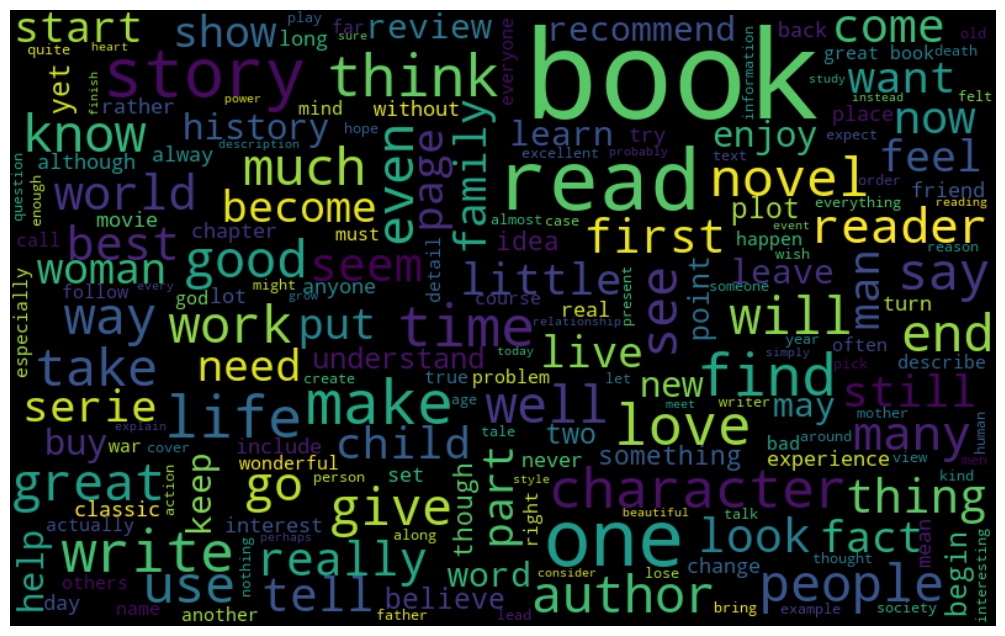

In [52]:
df['combine']=df['text'].apply(lambda x: ' '.join(x))
all_words = " ".join(sent for sent in df['combine'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()